## 1. [Matplotlib](#plt)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for visualization
%matplotlib inline
import seaborn as sns #for visualization

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# We dont use plt.show() if we use "% matplotlib inline"
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data.csv', 'googleplaystore.csv', 'googleplaystore_user_reviews.csv', 'test.csv', 'train.csv']


In [2]:
store = pd.read_csv("../input/googleplaystore.csv",usecols = [0,1,2,3,4,5,6,7,8,9,10]) 

#I dont wanna use "Current Ver" and "Android Ver" so ı use "usecols" 

In [3]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 931.8+ KB


In [4]:
store.head() #quick look at the csv from first index

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size     Installs  Type Price Content Rating  \
0      159   19M      10,000+  Free     0       Everyone   
1      967   14M     500,000+  Free     0       Everyone   
2    87510  8.7M   5,000,000+  Free     0       Everyone   
3   215644   25M  50,000,000+  Free     0           Teen   
4      967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated  
0               Art & Design   January 7, 2018  
1  Art & Design;Pretend Play  January 15, 2018  
2               Art & Design    August 1, 2018  
3               Art & Design      June 8, 2018  
4    Art & Design;Creativity     June 20, 2018

In [5]:
store.tail() #quick look at the csv from last index

App             Category  \
10836                               Sya9a Maroc - FR               FAMILY   
10837               Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                         Parkinson Exercices FR              MEDICAL   
10839                  The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840  iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews                Size     Installs  Type Price  \
10836     4.5       38                 53M       5,000+  Free     0   
10837     5.0        4                3.6M         100+  Free     0   
10838     NaN        3                9.5M       1,000+  Free     0   
10839     4.5      114  Varies with device       1,000+  Free     0   
10840     4.5   398307                 19M  10,000,000+  Free     0   

      Content Rating             Genres      Last Updated  
10836       Everyone          Education     July 25, 2017  
10837       Everyone          Education      July 6, 2018  
10838       Everyone            Medical  January 20, 2017  
10839     Mature 17+  Books & Reference  January 19, 2015  
10840       Everyone          Lifestyle     July 25, 2018

In [6]:
store.sample(6) #random 

App       Category  Rating  \
6478                                      postit.bm       SHOPPING     NaN   
4807                                    Rope Hero 3           GAME     4.4   
2368                                     live Point        MEDICAL     3.6   
471   JusTalk - Free Video Calls and Fun Video Chat  COMMUNICATION     4.6   
2912                            Facetune - For Free    PHOTOGRAPHY     4.4   
7206                       Shiver: Moonlit Grove CE         FAMILY     4.1   

      Reviews Size    Installs  Type  Price Content Rating         Genres  \
6478        1  16M        500+  Free      0       Everyone       Shopping   
4807    45871  99M  5,000,000+  Free      0           Teen         Action   
2368       54  17M      5,000+  Free      0     Mature 17+        Medical   
471    191032  26M  5,000,000+  Free      0       Everyone  Communication   
2912    49553  48M  1,000,000+  Paid  $5.99       Everyone    Photography   
7206     3433  23M     50,000+  Free      0   Everyone 10+         Casual   

        Last Updated  
6478  March 14, 2018  
4807     May 8, 2017  
2368    July 3, 2018  
471   August 4, 2018  
2912   July 25, 2018  
7206  March 14, 2016

In [7]:
store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated'],
      dtype='object')

In [8]:
store.columns = store.columns.str.replace(" ","_") #adding "_" to columns which has space.

In [9]:
store.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
dtype: object

### We have to change columns'  types but when I try change I get alot error so I tidy column step by step.
Check this : https://www.kaggle.com/sabasiddiqi/google-play-store-apps-data-cleaning


In [10]:
store.Size = store.Size.replace("Varies with device",np.nan)
store.Size = store.Size.str.replace("M","000")
store.Size = store.Size.str.replace("k","")
#store.Size = store.Size.apply(lambda x: float(x.replace("k",""))/1000 if "k" in x else x)
#ı wanted use this but ı get error so ı added "000" to Megabyte

store.Size = store.Size.replace("1,000+",1000)

store.Installs = store.Installs.str.replace(",","")
store.Installs = store.Installs.apply(lambda x: x.strip("+"))
store.Installs = store.Installs.replace("Free",np.nan)

store.Price = store.Price.str.replace("$","")

store = store.drop(store.index[10472])

store[["Size","Installs","Reviews","Price"]] = store[["Size","Installs","Reviews","Price"]].astype("float")

In [11]:
store.Category = store.Category.astype("category")

In [12]:
store.Installs = pd.to_numeric(store.Installs)
store.Price = pd.to_numeric(store.Price)
store = store.drop_duplicates(subset = "App", keep = "first")

In [13]:
store.dtypes

App                 object
Category          category
Rating             float64
Reviews            float64
Size               float64
Installs           float64
Type                object
Price              float64
Content_Rating      object
Genres              object
Last_Updated        object
dtype: object

In [14]:
store.corr()

Rating   Reviews      Size  Installs     Price
Rating    1.000000  0.055081  0.061223  0.040143 -0.021199
Reviews   0.055081  1.000000  0.176255  0.625165 -0.007598
Size      0.061223  0.176255  1.000000  0.133988 -0.022141
Installs  0.040143  0.625165  0.133988  1.000000 -0.009405
Price    -0.021199 -0.007598 -0.022141 -0.009405  1.000000

<AxesSubplot:>

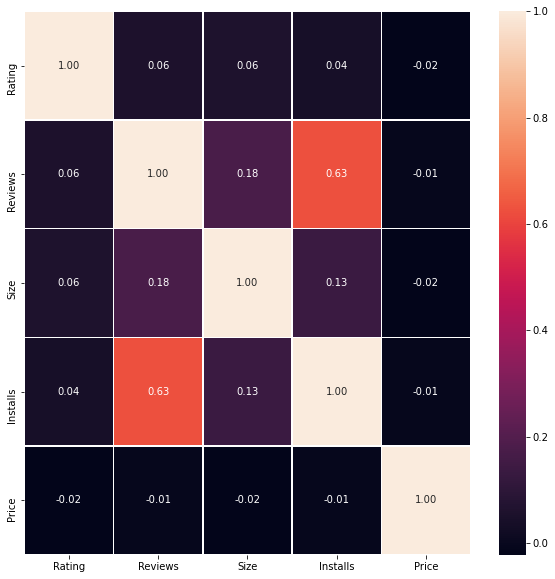

In [15]:
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(store.corr(), annot = True, linewidths = .5, fmt = ".2f", ax=ax)

In [16]:
#I wanna seperate free and paid apps so I can analysis objectively
free = store[store.Type == "Free"]
paid = store[store.Type == "Paid"]

## <a id=plt>1. Matplotlib</a>

 ### Line Plot
*     İt is better when x axis is time.

In [17]:
store.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews     Size    Installs  Type  Price Content_Rating  \
0     159.0  19000.0     10000.0  Free    0.0       Everyone   
1     967.0  14000.0    500000.0  Free    0.0       Everyone   
2   87510.0      8.7   5000000.0  Free    0.0       Everyone   
3  215644.0  25000.0  50000000.0  Free    0.0           Teen   
4     967.0      2.8    100000.0  Free    0.0       Everyone   

                      Genres      Last_Updated  
0               Art & Design   January 7, 2018  
1  Art & Design;Pretend Play  January 15, 2018  
2               Art & Design    August 1, 2018  
3               Art & Design      June 8, 2018  
4    Art & Design;Creativity     June 20, 2018

Text(0.5, 1.0, 'Paid App-Reviews')

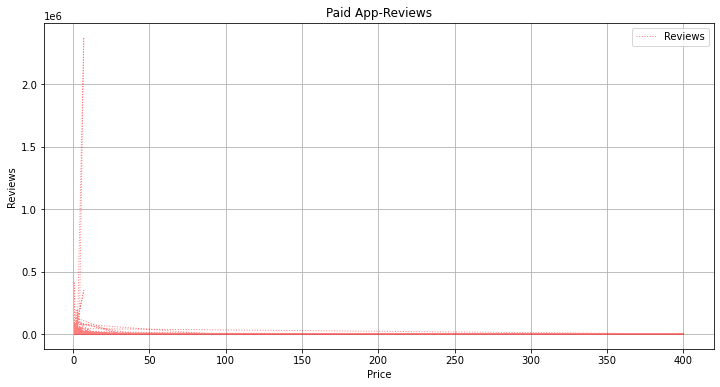

In [18]:
#We can see clearly reviews decreasing as the price increases.
paid.plot(kind = "line",x = "Price", y = "Reviews", color = "r", linestyle = ":", alpha = .5, 
          grid = True, linewidth = 1, figsize = (12,6))
plt.xlabel("Price")
plt.ylabel("Reviews")
plt.title("Paid App-Reviews")


Text(0.5, 1.0, 'Free-Paid')

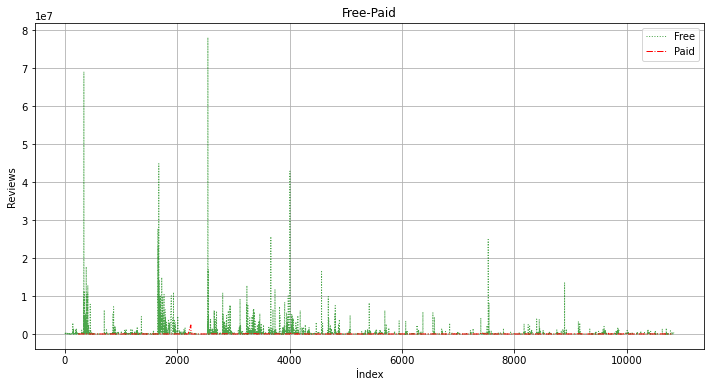

In [19]:
# We can comprasion free and paid app reviews
free.Reviews.plot(kind = "line", color = "g", linestyle = ":", alpha = .7, 
          grid = True, linewidth = 1, figsize = (12,6), label = "Free")
paid.Reviews.plot(kind = "line", color = "r", linestyle = "-.", alpha = 1, 
          grid = True, linewidth = 1, figsize = (12,6), label = "Paid")
plt.legend()
plt.xlabel("İndex")
plt.ylabel("Reviews")
plt.title("Free-Paid")


### Scatter Plot
* İt is better when there is correlation between two variables.

Text(0, 0.5, 'Price')

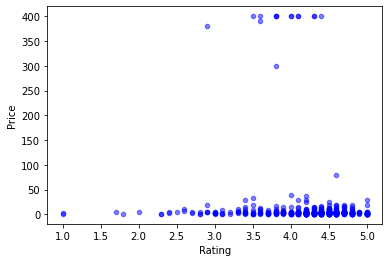

In [20]:
#We can see this plot nearly almost cheap applications has  high rating.
paid.plot(kind = "scatter", x = "Rating", y = "Price", alpha = .5, color = "b")
plt.xlabel("Rating")
plt.ylabel("Price")


### Histogram Plot
* İt is better when we need see distribution of numerical data.    


Text(0.5, 1.0, 'Rating of Distribution')

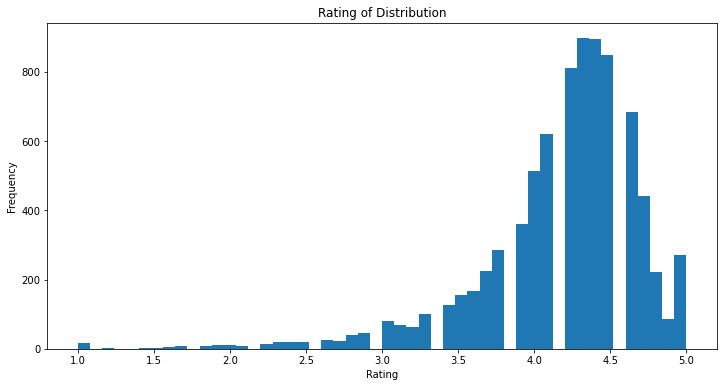

In [21]:
store.Rating.plot(kind = "hist", bins = 50, figsize = (12,6))
plt.xlabel("Rating")
plt.title("Rating of Distribution")


<AxesSubplot:>

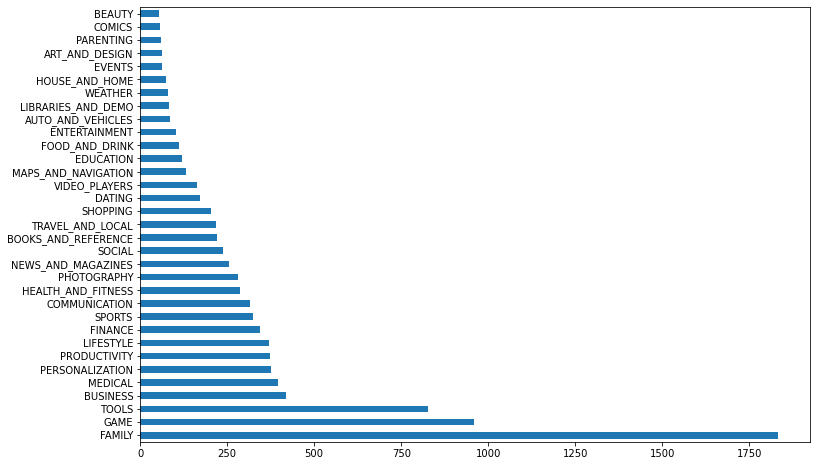

In [22]:
store.Category.value_counts().plot(kind='barh',figsize= (12,8))


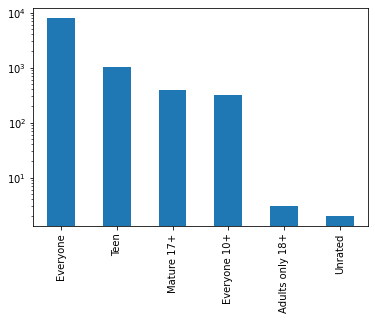

In [23]:
store.Content_Rating.value_counts().plot(kind="bar")
plt.yscale("log")

### User Defined Function

In [24]:
def expensive(count=5):
    exp = store.sort_values(by=["Price"],ascending = False).head(count)
    return exp
expensive(10)

App   Category  Rating  Reviews     Size  \
4367           I'm Rich - Trump Edition  LIFESTYLE     3.6    275.0      7.3   
9934  I'm Rich/Eu sou Rico/أنا غني/我很有錢  LIFESTYLE     NaN      0.0  40000.0   
5359                 I am rich(premium)    FINANCE     3.5    472.0    965.0   
5358                         I am Rich!    FINANCE     3.8     93.0  22000.0   
5373                 I AM RICH PRO PLUS    FINANCE     4.0     36.0  41000.0   
5356                  I Am Rich Premium    FINANCE     4.1   1867.0      4.7   
5354                     I am Rich Plus     FAMILY     4.0    856.0      8.7   
5364     I am rich (Most expensive app)    FINANCE     4.1    129.0      2.7   
5369                          I am Rich    FINANCE     4.3    180.0      3.8   
5351                          I am rich  LIFESTYLE     3.8   3547.0      1.8   

      Installs  Type   Price Content_Rating         Genres       Last_Updated  
4367   10000.0  Paid  400.00       Everyone      Lifestyle        May 3, 2018  
9934       0.0  Paid  399.99       Everyone      Lifestyle   December 1, 2017  
5359    5000.0  Paid  399.99       Everyone        Finance        May 1, 2017  
5358    1000.0  Paid  399.99       Everyone        Finance  December 11, 2017  
5373    1000.0  Paid  399.99       Everyone        Finance      June 25, 2018  
5356   50000.0  Paid  399.99       Everyone        Finance  November 12, 2017  
5354   10000.0  Paid  399.99       Everyone  Entertainment       May 19, 2018  
5364    1000.0  Paid  399.99           Teen        Finance   December 6, 2017  
5369    5000.0  Paid  399.99       Everyone        Finance     March 22, 2018  
5351  100000.0  Paid  399.99       Everyone      Lifestyle   January 12, 2018

### Filtering Data

In [25]:
#expensive applications
exp = paid["Price"]>100
paid[exp]

App      Category  Rating  Reviews  \
4197             most expensive app (H)        FAMILY     4.3      6.0   
4362                         💎 I'm rich     LIFESTYLE     3.8    718.0   
4367           I'm Rich - Trump Edition     LIFESTYLE     3.6    275.0   
5351                          I am rich     LIFESTYLE     3.8   3547.0   
5354                     I am Rich Plus        FAMILY     4.0    856.0   
5355                      I am rich VIP     LIFESTYLE     3.8    411.0   
5356                  I Am Rich Premium       FINANCE     4.1   1867.0   
5357                I am extremely Rich     LIFESTYLE     2.9     41.0   
5358                         I am Rich!       FINANCE     3.8     93.0   
5359                 I am rich(premium)       FINANCE     3.5    472.0   
5362                      I Am Rich Pro        FAMILY     4.4    201.0   
5364     I am rich (Most expensive app)       FINANCE     4.1    129.0   
5366                          I Am Rich        FAMILY     3.6    217.0   
5369                          I am Rich       FINANCE     4.3    180.0   
5373                 I AM RICH PRO PLUS       FINANCE     4.0     36.0   
6624            BP Fitness Lead Scanner        EVENTS     NaN      0.0   
6692                      cronometra-br  PRODUCTIVITY     NaN      0.0   
9719                       EP Cook Book       MEDICAL     NaN      0.0   
9917                        Eu Sou Rico       FINANCE     NaN      0.0   
9934  I'm Rich/Eu sou Rico/أنا غني/我很有錢     LIFESTYLE     NaN      0.0   

         Size  Installs  Type   Price Content_Rating         Genres  \
4197      1.5     100.0  Paid  399.99       Everyone  Entertainment   
4362  26000.0   10000.0  Paid  399.99       Everyone      Lifestyle   
4367      7.3   10000.0  Paid  400.00       Everyone      Lifestyle   
5351      1.8  100000.0  Paid  399.99       Everyone      Lifestyle   
5354      8.7   10000.0  Paid  399.99       Everyone  Entertainment   
5355      2.6   10000.0  Paid  299.99       Everyone      Lifestyle   
5356      4.7   50000.0  Paid  399.99       Everyone        Finance   
5357      2.9    1000.0  Paid  379.99       Everyone      Lifestyle   
5358  22000.0    1000.0  Paid  399.99       Everyone        Finance   
5359    965.0    5000.0  Paid  399.99       Everyone        Finance   
5362      2.7    5000.0  Paid  399.99       Everyone  Entertainment   
5364      2.7    1000.0  Paid  399.99           Teen        Finance   
5366      4.9   10000.0  Paid  389.99       Everyone  Entertainment   
5369      3.8    5000.0  Paid  399.99       Everyone        Finance   
5373  41000.0    1000.0  Paid  399.99       Everyone        Finance   
6624      6.7       1.0  Paid  109.99       Everyone         Events   
6692      5.4       0.0  Paid  154.99       Everyone   Productivity   
9719      3.2       0.0  Paid  200.00       Everyone        Medical   
9917      1.4       0.0  Paid  394.99       Everyone        Finance   
9934  40000.0       0.0  Paid  399.99       Everyone      Lifestyle   

           Last_Updated  
4197      July 16, 2018  
4362     March 11, 2018  
4367        May 3, 2018  
5351   January 12, 2018  
5354       May 19, 2018  
5355      July 21, 2018  
5356  November 12, 2017  
5357       July 1, 2018  
5358  December 11, 2017  
5359        May 1, 2017  
5362       May 30, 2017  
5364   December 6, 2017  
5366      June 22, 2018  
5369     March 22, 2018  
5373      June 25, 2018  
6624    August 23, 2017  
6692  November 24, 2017  
9719      July 26, 2015  
9917      July 11, 2018  
9934   December 1, 2017

In [26]:
x = paid[(paid.Price>100) & (paid.Rating>4)]
x

App Category  Rating  Reviews  Size  \
4197          most expensive app (H)   FAMILY     4.3      6.0   1.5   
5356               I Am Rich Premium  FINANCE     4.1   1867.0   4.7   
5362                   I Am Rich Pro   FAMILY     4.4    201.0   2.7   
5364  I am rich (Most expensive app)  FINANCE     4.1    129.0   2.7   
5369                       I am Rich  FINANCE     4.3    180.0   3.8   

      Installs  Type   Price Content_Rating         Genres       Last_Updated  
4197     100.0  Paid  399.99       Everyone  Entertainment      July 16, 2018  
5356   50000.0  Paid  399.99       Everyone        Finance  November 12, 2017  
5362    5000.0  Paid  399.99       Everyone  Entertainment       May 30, 2017  
5364    1000.0  Paid  399.99           Teen        Finance   December 6, 2017  
5369    5000.0  Paid  399.99       Everyone        Finance     March 22, 2018

In [27]:
for index,value in paid[["App"]].head().iterrows():  #iterrows gives us index and value. İt is like "enumerate" in list
    print(index,":",value)

234 : App    TurboScan: scan documents and receipts in PDF
Name: 234, dtype: object
235 : App    Tiny Scanner Pro: PDF Doc Scan
Name: 235, dtype: object
427 : App    Puffin Browser Pro
Name: 427, dtype: object
476 : App    Moco+ - Chat, Meet People
Name: 476, dtype: object
477 : App    Calculator
Name: 477, dtype: object


### Melt & Pivot

In [28]:
paid_head = paid.head()
paid_head

App       Category  Rating  \
234  TurboScan: scan documents and receipts in PDF       BUSINESS     4.7   
235                 Tiny Scanner Pro: PDF Doc Scan       BUSINESS     4.8   
427                             Puffin Browser Pro  COMMUNICATION     4.0   
476                      Moco+ - Chat, Meet People         DATING     4.2   
477                                     Calculator         DATING     2.6   

     Reviews     Size  Installs  Type  Price Content_Rating         Genres  \
234  11442.0      6.8  100000.0  Paid   4.99       Everyone       Business   
235  10295.0  39000.0  100000.0  Paid   4.99       Everyone       Business   
427  18247.0      NaN  100000.0  Paid   3.99       Everyone  Communication   
476   1545.0      NaN   10000.0  Paid   3.99     Mature 17+         Dating   
477     57.0      6.2    1000.0  Paid   6.99       Everyone         Dating   

         Last_Updated  
234    March 25, 2018  
235    April 11, 2017  
427      July 5, 2018  
476     June 19, 2018  
477  October 25, 2017

In [29]:
melted = pd.melt(frame = paid_head, id_vars = "App",value_vars = ["Installs","Price"])
melted

App  variable      value
0  TurboScan: scan documents and receipts in PDF  Installs  100000.00
1                 Tiny Scanner Pro: PDF Doc Scan  Installs  100000.00
2                             Puffin Browser Pro  Installs  100000.00
3                      Moco+ - Chat, Meet People  Installs   10000.00
4                                     Calculator  Installs    1000.00
5  TurboScan: scan documents and receipts in PDF     Price       4.99
6                 Tiny Scanner Pro: PDF Doc Scan     Price       4.99
7                             Puffin Browser Pro     Price       3.99
8                      Moco+ - Chat, Meet People     Price       3.99
9                                     Calculator     Price       6.99

In [30]:
melted.pivot(index = "App", columns = "variable", values = "value")

variable                                       Installs  Price
App                                                           
Calculator                                       1000.0   6.99
Moco+ - Chat, Meet People                       10000.0   3.99
Puffin Browser Pro                             100000.0   3.99
Tiny Scanner Pro: PDF Doc Scan                 100000.0   4.99
TurboScan: scan documents and receipts in PDF  100000.0   4.99

 ### Concatenating Data

In [31]:
#Adding from row axis = 0
f1 = free.head()
f2 = free.tail()
conc = pd.concat([f1,f2],axis = 0, ignore_index = True)
conc

App             Category  \
0     Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                Coloring book moana       ART_AND_DESIGN   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                              Sketch - Draw & Paint       ART_AND_DESIGN   
4              Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                                   Sya9a Maroc - FR               FAMILY   
6                   Fr. Mike Schmitz Audio Teachings               FAMILY   
7                             Parkinson Exercices FR              MEDICAL   
8                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
9      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

   Rating   Reviews     Size    Installs  Type  Price Content_Rating  \
0     4.1     159.0  19000.0     10000.0  Free    0.0       Everyone   
1     3.9     967.0  14000.0    500000.0  Free    0.0       Everyone   
2     4.7   87510.0      8.7   5000000.0  Free    0.0       Everyone   
3     4.5  215644.0  25000.0  50000000.0  Free    0.0           Teen   
4     4.3     967.0      2.8    100000.0  Free    0.0       Everyone   
5     4.5      38.0  53000.0      5000.0  Free    0.0       Everyone   
6     5.0       4.0      3.6       100.0  Free    0.0       Everyone   
7     NaN       3.0      9.5      1000.0  Free    0.0       Everyone   
8     4.5     114.0      NaN      1000.0  Free    0.0     Mature 17+   
9     4.5  398307.0  19000.0  10000000.0  Free    0.0       Everyone   

                      Genres      Last_Updated  
0               Art & Design   January 7, 2018  
1  Art & Design;Pretend Play  January 15, 2018  
2               Art & Design    August 1, 2018  
3               Art & Design      June 8, 2018  
4    Art & Design;Creativity     June 20, 2018  
5                  Education     July 25, 2017  
6                  Education      July 6, 2018  
7                    Medical  January 20, 2017  
8          Books & Reference  January 19, 2015  
9                  Lifestyle     July 25, 2018

In [32]:
#Adding from column axis = 1
app = store.App.head()
rate = store.Rating.head()
conc = pd.concat([app,rate], axis = 1)
conc

App  Rating
0     Photo Editor & Candy Camera & Grid & ScrapBook     4.1
1                                Coloring book moana     3.9
2  U Launcher Lite – FREE Live Cool Themes, Hide ...     4.7
3                              Sketch - Draw & Paint     4.5
4              Pixel Draw - Number Art Coloring Book     4.3

### Missing Data And Checking With Assert

In [33]:
store.isnull().sum() #detect missing values

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
Last_Updated         0
dtype: int64

In [34]:
store.Size.value_counts(dropna=False) #1227 NaN value

NaN        1227
11000.0     182
12000.0     181
13000.0     177
14000.0     177
           ... 
976.0         1
186.0         1
55.0          1
161.0         1
23.0          1
Name: Size, Length: 460, dtype: int64

In [35]:
store1 = store.copy()
store1.Size.dropna(inplace = True) #dropped nan values

In [36]:
# assert store1.Size.notnull().all() #checking with assert . return nothing because we drop nan values

AssertionError: 

In [37]:
store1.Size.fillna(0,inplace = True) #filling nan values with "0"

### Adding new column

In [38]:
paid1 = paid.copy()
paid1["total_money"] = paid1.Installs*paid1.Price
paid1.head()

App       Category  Rating  \
234  TurboScan: scan documents and receipts in PDF       BUSINESS     4.7   
235                 Tiny Scanner Pro: PDF Doc Scan       BUSINESS     4.8   
427                             Puffin Browser Pro  COMMUNICATION     4.0   
476                      Moco+ - Chat, Meet People         DATING     4.2   
477                                     Calculator         DATING     2.6   

     Reviews     Size  Installs  Type  Price Content_Rating         Genres  \
234  11442.0      6.8  100000.0  Paid   4.99       Everyone       Business   
235  10295.0  39000.0  100000.0  Paid   4.99       Everyone       Business   
427  18247.0      NaN  100000.0  Paid   3.99       Everyone  Communication   
476   1545.0      NaN   10000.0  Paid   3.99     Mature 17+         Dating   
477     57.0      6.2    1000.0  Paid   6.99       Everyone         Dating   

         Last_Updated  total_money  
234    March 25, 2018     499000.0  
235    April 11, 2017     499000.0  
427      July 5, 2018     399000.0  
476     June 19, 2018      39900.0  
477  October 25, 2017       6990.0

### Vısual Exploratory Data Analysis

In [39]:
paid.head(75).describe()

Rating       Reviews          Size      Installs      Price
count  72.000000  7.500000e+01     64.000000  7.500000e+01  75.000000
mean    4.356944  3.732461e+04  27369.621875  1.855620e+05   6.283600
std     0.466279  2.742513e+05  25048.867329  1.155944e+06   9.418696
min     2.500000  0.000000e+00      1.200000  5.000000e+01   0.990000
25%     4.200000  6.000000e+01    532.500000  1.000000e+03   2.990000
50%     4.500000  3.820000e+02  23000.000000  1.000000e+04   3.990000
75%     4.600000  3.462000e+03  44000.000000  1.000000e+05   5.990000
max     5.000000  2.376564e+06  84000.000000  1.000000e+07  79.990000

<AxesSubplot:title={'center':'Price'}, xlabel='Rating'>

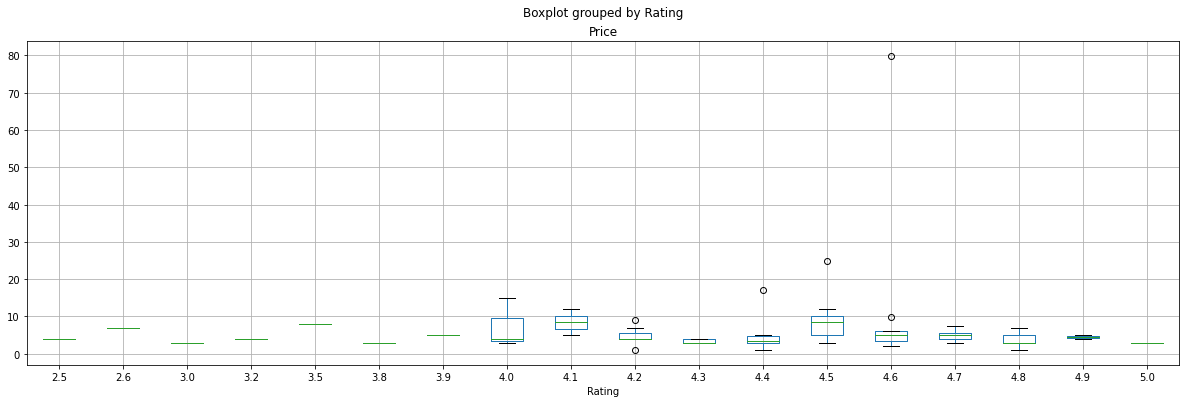

In [40]:
paid.head(75).boxplot(column = "Price", by = "Rating", figsize = (20,6))

#### Histogram

In [42]:
# store.plot(kind = "hist", y = "Rating", bins = 50,range = (0,5), normed = True, figsize = (12,6))

In [43]:
# fig,axes = plt.subplots(nrows = 2, ncols = 1)
# store.plot(kind = "hist", y = "Rating", bins =50, range = (0,5), normed = True, ax = axes[0])
# store.plot(kind = "hist", y = "Rating", bins =50, range = (0,5), normed = True, ax = axes[1], cumulative = True)
# plt.savefig("graph.png")

### Indexing Pandas Time Series

In [44]:
store1 = store.copy()
store1["Last_Updated"] = pd.to_datetime(store1.Last_Updated)
store1.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews     Size    Installs  Type  Price Content_Rating  \
0     159.0  19000.0     10000.0  Free    0.0       Everyone   
1     967.0  14000.0    500000.0  Free    0.0       Everyone   
2   87510.0      8.7   5000000.0  Free    0.0       Everyone   
3  215644.0  25000.0  50000000.0  Free    0.0           Teen   
4     967.0      2.8    100000.0  Free    0.0       Everyone   

                      Genres Last_Updated  
0               Art & Design   2018-01-07  
1  Art & Design;Pretend Play   2018-01-15  
2               Art & Design   2018-08-01  
3               Art & Design   2018-06-08  
4    Art & Design;Creativity   2018-06-20

In [45]:
store1 = store1.set_index("Last_Updated")
store1.head()

App  \
Last_Updated                                                      
2018-01-07       Photo Editor & Candy Camera & Grid & ScrapBook   
2018-01-15                                  Coloring book moana   
2018-08-01    U Launcher Lite – FREE Live Cool Themes, Hide ...   
2018-06-08                                Sketch - Draw & Paint   
2018-06-20                Pixel Draw - Number Art Coloring Book   

                    Category  Rating   Reviews     Size    Installs  Type  \
Last_Updated                                                                
2018-01-07    ART_AND_DESIGN     4.1     159.0  19000.0     10000.0  Free   
2018-01-15    ART_AND_DESIGN     3.9     967.0  14000.0    500000.0  Free   
2018-08-01    ART_AND_DESIGN     4.7   87510.0      8.7   5000000.0  Free   
2018-06-08    ART_AND_DESIGN     4.5  215644.0  25000.0  50000000.0  Free   
2018-06-20    ART_AND_DESIGN     4.3     967.0      2.8    100000.0  Free   

              Price Content_Rating                     Genres  
Last_Updated                                                   
2018-01-07      0.0       Everyone               Art & Design  
2018-01-15      0.0       Everyone  Art & Design;Pretend Play  
2018-08-01      0.0       Everyone               Art & Design  
2018-06-08      0.0           Teen               Art & Design  
2018-06-20      0.0       Everyone    Art & Design;Creativity

In [46]:
#we can select according to our date index
store1.loc["2018-01-01":"2018-01-02"] #this show us which app updated in 2days

App      Category  \
Last_Updated                                                                  
2018-01-02                               Pain Tracker & Diary       MEDICAL   
2018-01-02                                        HealtheLife       MEDICAL   
2018-01-02                           Photo Collage - InstaMag   PHOTOGRAPHY   
2018-01-01                                      How Old am I?        FAMILY   
2018-01-02                            Oddworld: New 'n' Tasty          GAME   
2018-01-02                                   SH Script Runner  PRODUCTIVITY   
2018-01-02                                      Ba Zi Fortune     LIFESTYLE   
2018-01-01                     Millionaire Quiz Free: Be Rich        FAMILY   
2018-01-02                                              CE BF     LIFESTYLE   
2018-01-02                                          RIDE ZERO          GAME   
2018-01-01                     Job CV Maker & Portfolio Maker        FAMILY   
2018-01-02                                              CX-42        FAMILY   
2018-01-02                      CY Security Antivirus Cleaner  PRODUCTIVITY   
2018-01-02                                        The Visitor          GAME   
2018-01-02                                 Satellite Director         TOOLS   
2018-01-01    DP Display Pictures Life Quotes Motivational GM        SOCIAL   
2018-01-02                                          Dr. Shogi          GAME   
2018-01-02            The Visitor: Ep.2 - Sleepover Slaughter          GAME   
2018-01-02              The Visitor: Ep.1 - Kitty Cat Carnage          GAME   
2018-01-02                         Lettre et demande d'emploi        FAMILY   

              Rating   Reviews     Size    Installs  Type  Price  \
Last_Updated                                                       
2018-01-02       4.3       3.0      4.6       100.0  Paid   2.99   
2018-01-02       3.6     190.0      7.7    100000.0  Free   0.00   
2018-01-02       4.3  542561.0  46000.0  10000000.0  Free   0.00   
2018-01-01       2.8    4635.0      3.9   1000000.0  Free   0.00   
2018-01-02       4.6    1475.0  34000.0     10000.0  Paid   4.99   
2018-01-02       3.9     334.0      3.7     50000.0  Free   0.00   
2018-01-02       3.9     592.0      2.5    100000.0  Free   0.00   
2018-01-01       3.8   66033.0      6.8  10000000.0  Free   0.00   
2018-01-02       NaN       0.0  24000.0        50.0  Free   0.00   
2018-01-02       4.6    8778.0  36000.0    100000.0  Free   0.00   
2018-01-01       4.2     593.0      4.9    100000.0  Free   0.00   
2018-01-02       NaN       0.0  32000.0        10.0  Free   0.00   
2018-01-02       4.5   75140.0      NaN   1000000.0  Free   0.00   
2018-01-02       4.1   39895.0  25000.0   5000000.0  Free   0.00   
2018-01-02       4.1   45610.0    176.0  10000000.0  Free   0.00   
2018-01-01       4.4      39.0  11000.0      5000.0  Free   0.00   
2018-01-02       3.3   19291.0      5.1   1000000.0  Free   0.00   
2018-01-02       4.3    5731.0  31000.0   1000000.0  Free   0.00   
2018-01-02       4.4    3017.0  39000.0    500000.0  Free   0.00   
2018-01-02       4.6     302.0      9.9    100000.0  Free   0.00   

             Content_Rating         Genres  
Last_Updated                                
2018-01-02         Everyone        Medical  
2018-01-02         Everyone        Medical  
2018-01-02         Everyone    Photography  
2018-01-01         Everyone  Entertainment  
2018-01-02             Teen         Action  
2018-01-02         Everyone   Productivity  
2018-01-02         Everyone      Lifestyle  
2018-01-01         Everyone         Casual  
2018-01-02         Everyone      Lifestyle  
2018-01-02             Teen          Music  
2018-01-01         Everyone      Education  
2018-01-02         Everyone         Casual  
2018-01-02         Everyone   Productivity  
2018-01-02       Mature 17+      Adventure  
2018-01-02         Everyone          Tools  
2018-01-01         Everyone         Social  
2018-01-02  

In [47]:
store1.resample("A").mean() #this is getting an average to store for year(A) or month(M)

Rating        Reviews          Size      Installs     Price
Last_Updated                                                               
2010-12-31    4.200000    1415.000000    209.000000  1.000000e+05  0.000000
2011-12-31    3.966667   15720.000000    995.453333  1.160473e+06  0.498667
2012-12-31    3.785714   10398.538462   1209.520000  5.381619e+05  0.318077
2013-12-31    4.069565   33088.407407   6367.577670  9.545034e+05  0.799630
2014-12-31    4.034783   32353.852217   7822.786154  1.328991e+06  1.152217
2015-12-31    4.064908   29093.674833   8014.904147  9.027605e+05  1.286548
2016-12-31    4.037898   28781.191271  13042.347521  1.659006e+06  0.566650
2017-12-31    4.087938   38433.230769  15414.419833  1.612654e+06  1.967876
2018-12-31    4.227174  314606.268778  21671.040940  1.115973e+07  0.912264

In [48]:
store1.resample("M").mean()
# As you can see there are a lot of nan because store1 does not include all months

Rating        Reviews          Size      Installs     Price
Last_Updated                                                               
2010-05-31    4.200000    1415.000000    209.000000  1.000000e+05  0.000000
2010-06-30         NaN            NaN           NaN           NaN       NaN
2010-07-31         NaN            NaN           NaN           NaN       NaN
2010-08-31         NaN            NaN           NaN           NaN       NaN
2010-09-30         NaN            NaN           NaN           NaN       NaN
...                ...            ...           ...           ...       ...
2018-04-30    4.162829   49769.649746  17468.112088  3.145168e+06  0.353274
2018-05-31    4.174497  104749.719247  18789.384768  4.984702e+06  1.407279
2018-06-30    4.200757  198187.493976  21630.785878  5.011501e+06  1.311161
2018-07-31    4.244407  366878.095259  24242.768468  1.212254e+07  0.792267
2018-08-31    4.320973  829310.169908  27033.451449  3.145139e+07  0.165261

[100 rows x 5 columns]

store1.resample("M").first().interpolate("linear")

store1.resample("M").first().interpolate("linear")

store1.resample("M").mean().interpolate("linear")

### Setting İndexing

In [52]:
store2 = store.copy()
store2.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews     Size    Installs  Type  Price Content_Rating  \
0     159.0  19000.0     10000.0  Free    0.0       Everyone   
1     967.0  14000.0    500000.0  Free    0.0       Everyone   
2   87510.0      8.7   5000000.0  Free    0.0       Everyone   
3  215644.0  25000.0  50000000.0  Free    0.0           Teen   
4     967.0      2.8    100000.0  Free    0.0       Everyone   

                      Genres      Last_Updated  
0               Art & Design   January 7, 2018  
1  Art & Design;Pretend Play  January 15, 2018  
2               Art & Design    August 1, 2018  
3               Art & Design      June 8, 2018  
4    Art & Design;Creativity     June 20, 2018

In [53]:
store2 = store2.set_index(["Category","Type"])

In [54]:
#store2.sample(50)

### Pivoting

In [55]:
paid.pivot(index = "App", columns = "Content_Rating", values = "Price")

Content_Rating                                      Everyone  Everyone 10+  \
App                                                                          
10 WPM Amateur ham radio CW Morse code trainer          1.49           NaN   
10,000 Quotes DB (Premium)                              0.99           NaN   
17th Edition Cable Sizer                                3.08           NaN   
2 Amateur ham radio CW Morse code practice keys TX      1.49           NaN   
2017 EMRA Antibiotic Guide                             16.99           NaN   
...                                                      ...           ...   
weather HD                                              1.99           NaN   
¡Ay Caramba!                                            1.99           NaN   
Égalité et Réconciliation                               2.99           NaN   
Билеты ПДД CD 2019 PRO                                  1.49           NaN   
💎 I'm rich                                            399.99           NaN   

Content_Rating                                      Mature 17+  Teen  
App                                                                   
10 WPM Amateur ham radio CW Morse code trainer             NaN   NaN  
10,000 Quotes DB (Premium)                                 NaN   NaN  
17th Edition Cable Sizer                                   NaN   NaN  
2 Amateur ham radio CW Morse code practice keys TX         NaN   NaN  
2017 EMRA Antibiotic Guide                                 NaN   NaN  
...                                                        ...   ...  
weather HD                                                 NaN   NaN  
¡Ay Caramba!                                               NaN   NaN  
Égalité et Réconciliation                                  NaN   NaN  
Билеты ПДД CD 2019 PRO                                     NaN   NaN  
💎 I'm rich                                                 NaN   NaN  

[756 rows x 4 columns]

In [56]:
store.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews     Size    Installs  Type  Price Content_Rating  \
0     159.0  19000.0     10000.0  Free    0.0       Everyone   
1     967.0  14000.0    500000.0  Free    0.0       Everyone   
2   87510.0      8.7   5000000.0  Free    0.0       Everyone   
3  215644.0  25000.0  50000000.0  Free    0.0           Teen   
4     967.0      2.8    100000.0  Free    0.0       Everyone   

                      Genres      Last_Updated  
0               Art & Design   January 7, 2018  
1  Art & Design;Pretend Play  January 15, 2018  
2               Art & Design    August 1, 2018  
3               Art & Design      June 8, 2018  
4    Art & Design;Creativity     June 20, 2018

### Change İndex

In [57]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   App             9659 non-null   object  
 1   Category        9659 non-null   category
 2   Rating          8196 non-null   float64 
 3   Reviews         9659 non-null   float64 
 4   Size            8432 non-null   float64 
 5   Installs        9659 non-null   float64 
 6   Type            9658 non-null   object  
 7   Price           9659 non-null   float64 
 8   Content_Rating  9659 non-null   object  
 9   Genres          9659 non-null   object  
 10  Last_Updated    9659 non-null   object  
dtypes: category(1), float64(5), object(5)
memory usage: 841.0+ KB


In [58]:
store.index = range(1,9660 ,1) #our index is starting with "0" I wanna chage with "1"
store.head()

App        Category  Rating  \
1     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
2                                Coloring book moana  ART_AND_DESIGN     3.9   
3  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
4                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
5              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews     Size    Installs  Type  Price Content_Rating  \
1     159.0  19000.0     10000.0  Free    0.0       Everyone   
2     967.0  14000.0    500000.0  Free    0.0       Everyone   
3   87510.0      8.7   5000000.0  Free    0.0       Everyone   
4  215644.0  25000.0  50000000.0  Free    0.0           Teen   
5     967.0      2.8    100000.0  Free    0.0       Everyone   

                      Genres      Last_Updated  
1               Art & Design   January 7, 2018  
2  Art & Design;Pretend Play  January 15, 2018  
3               Art & Design    August 1, 2018  
4               Art & Design      June 8, 2018  
5    Art & Design;Creativity     June 20, 2018

### Hierarchical İndexing

In [59]:
store1 = store.copy()

In [60]:
store1 = store1.set_index(["Category","Type"])
store1.head(50)

App  \
Category          Type                                                      
ART_AND_DESIGN    Free     Photo Editor & Candy Camera & Grid & ScrapBook   
                  Free                                Coloring book moana   
                  Free  U Launcher Lite – FREE Live Cool Themes, Hide ...   
                  Free                              Sketch - Draw & Paint   
                  Free              Pixel Draw - Number Art Coloring Book   
                  Free                         Paper flowers instructions   
                  Free            Smoke Effect Photo Maker - Smoke Editor   
                  Free                                   Infinite Painter   
                  Free                               Garden Coloring Book   
                  Free                      Kids Paint Free - Drawing Fun   
                  Free                            Text on Photo - Fonteee   
                  Free            Name Art Photo Editor - Focus n Filters   
                  Free                     Tattoo Name On My Photo Editor   
                  Free                              Mandala Coloring Book   
                  Free    3D Color Pixel by Number - Sandbox Art Coloring   
                  Free                    Learn To Draw Kawaii Characters   
                  Free       Photo Designer - Write your name with shapes   
                  Free                           350 Diy Room Decor Ideas   
                  Free                      FlipaClip - Cartoon animation   
                  Free                                       ibis Paint X   
                  Free                        Logo Maker - Small Business   
                  Free          Boys Photo Editor - Six Pack & Men's Suit   
                  Free            Superheroes Wallpapers | 4K Backgrounds   
                  Free                             Mcqueen Coloring pages   
                  Free                        HD Mickey Minnie Wallpapers   
                  Free                         Harley Quinn wallpapers HD   
                  Free                      Colorfit - Drawing & Coloring   
                  Free                              Animated Photo Editor   
                  Free                              Pencil Sketch Drawing   
                  Free                    Easy Realistic Drawing Tutorial   
                  Free                     Pink Silver Bow Keyboard Theme   
                  Free                                  Art Drawing Ideas   
                  Free                          Anime Manga Coloring Book   
                  Free                                 Easy Origami Ideas   
                  Free                                    I Creative Idea   
                  Free                   How to draw Ladybug and Cat Noir   
                  Free     UNICORN - Color By Number & Pixel Art Coloring   
                  Free                                 Floor Plan Creator   
                  Free                     PIP Camera - PIP Collage Maker   
                  Free      How To Color Disney Princess - Coloring Pages   
                  Free                      Drawing Clothes Fashion Ideas   
                  Free                       Sad Poetry Photo Frames 2018   
                  Free                         Textgram - write on photos   
                  Free                                      Paint Splash!   
                  Free        Popsicle Sticks and Similar DIY Craft Ideas   
                  Free  Canva: Poster, banner, card maker & graphic de...   
                  Free  Install images with music to make video withou...   
                  Free              Little Teddy Bear Colouring Book Game   
                  Free                                   How To Draw Food   
AUTO_AND_VEHICLES Free                        Monster Truck Stunt 3D 2019   

                        Rating   Reviews     Size    Installs  Pr

In [61]:
store2 = store.copy()

### Groupby

In [62]:
store2.groupby("Type").mean()

Rating        Reviews          Size      Installs      Price
Type                                                                
Free  4.166372  234270.002134  18472.471744  8.432439e+06   0.000000
Paid  4.259603    8724.887566  17238.126569  7.587947e+04  14.045146

In [63]:
store2.groupby("Type").Price.max()

Type
Free      0.0
Paid    400.0
Name: Price, dtype: float64

In [64]:
store2.groupby("Type")[["Installs","Rating"]].max()

Installs  Rating
Type                      
Free  1.000000e+09     5.0
Paid  1.000000e+07     5.0